In [1]:
# note: fdfdpy_OO must be in your JUPYTER_PATH for this import to work (or you can manually add it to path with some google=able code.)
from FDFD.Fdfd import Fdfd
from nonlinear_solvers import born_solve, newton_solve

import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
omega = 5e14                # angular frequency (2pi)
dl = 1e-7                   # grid size (m)
eps_r = np.ones((100,100))  # relative permittivity
eps_r[40:60, 40:60] = 5     # define box
NPML = [10, 10]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)

# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))
b[40:60,30] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b)

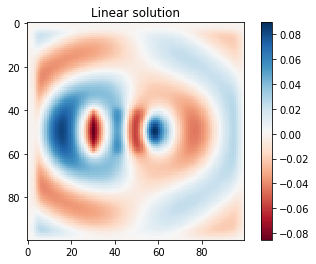

In [3]:
plt.imshow(np.real(Ez), cmap='RdBu')
plt.colorbar()
plt.title('Linear solution')
plt.show()

In [4]:
n2 = 150                    # Nonlinearity strength
nl_region = np.zeros(eps_r.shape)  # Nonliearity region
nl_region[40:60, 40:60] = 1
Nstep = 100                         # Number of steps for iterative solution
# Define nonlinear function
kerr_nonlinearity = lambda e: n2*np.square(np.abs(e))
# Define the partial derivative of the nonlinear function w.r.t. e
kerr_nl_de = lambda e: n2*np.conj(e)

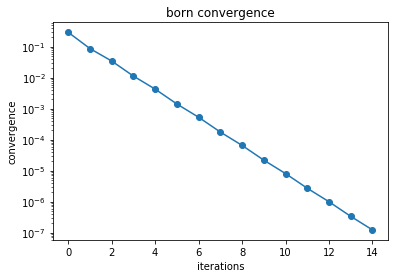

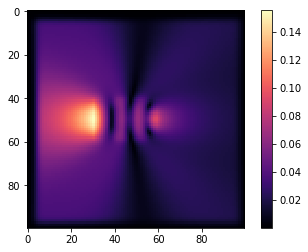

In [5]:
# Do a born solve for the nonlinear fields
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
(Ez_born, convergence_array) = born_solve(simulation,
                                        eps_r,
                                        b,
                                        kerr_nonlinearity,
                                        nl_region,
                                        conv_threshold=1e-18,
                                        max_num_iter=15)
plt.plot(convergence_array,"o-")
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('convergence')
plt.title('born convergence')
plt.show()

plt.figure()
plt.imshow(np.abs(Ez_born), cmap='magma')
plt.colorbar()
plt.show()

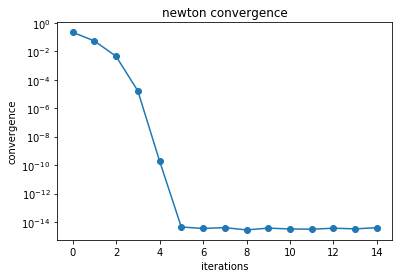

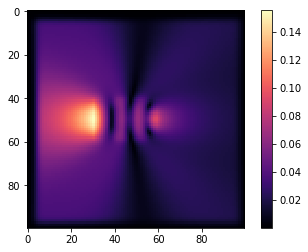

In [6]:
# Do a newton solve for the nonlinear fields
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
(Ez_newton, convergence_array) = newton_solve(simulation,
                                          eps_r,
                                          b,
                                          kerr_nonlinearity,
                                          kerr_nl_de,
                                          nl_region,
                                          conv_threshold=1e-18,
                                          max_num_iter=15)

plt.figure()
plt.plot(convergence_array,"o-")
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('convergence')
plt.title('newton convergence')
plt.show()

plt.figure()
plt.imshow(np.abs(Ez_newton), cmap='magma')
plt.colorbar()
plt.show()